<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%208%20-%20Metric%20Analysis/Week_8_Metric_Analysis_data_loading_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# MNIST dataset load

In [0]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

Note that we load the data and we normalize it immediately. So there is no need to normalize it later.

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
Xtrain = x_train.reshape(60000,784)
ytrain = y_train.reshape(60000,)

## Shift of the images

In [0]:
Xtrain_shifted = np.zeros_like(Xtrain)
for i in range(Xtrain.shape[0]):
    tmp = Xtrain[i,:].reshape(28,28)
    tmp_shifted = np.zeros_like(tmp)
    tmp_shifted[:,10:28] = tmp[:,0:18]
    Xtrain_shifted[i] = tmp_shifted.reshape(784)

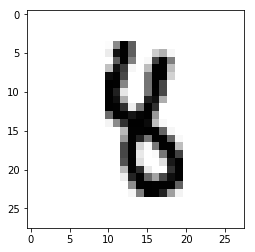

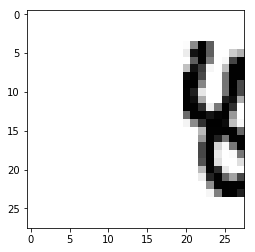

In [27]:
plot_digit(Xtrain[7000])
plot_digit(Xtrain_shifted[7000])

# Let's create a train, a train-dev and a dev dataset

## Train and dev datasets

In [0]:
X_ = Xtrain[np.any([ytrain == 1,ytrain == 2], axis = 0)]
y_ = ytrain[np.any([ytrain == 1,ytrain == 2], axis = 0)]

random split 80%/20%

In [0]:
np.random.seed(42)
rnd_train = np.random.rand(len(y_)) < 0.8

X_train = X_[rnd_train,:]
y_train = y_[rnd_train]
X_dev = X_[~rnd_train,:]
y_dev = y_[~rnd_train]

Reshaping of the arrays

In [0]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]

X_dev_tr = X_dev.transpose()
y_dev_tr = y_dev.reshape(1,y_dev.shape[0])

In [0]:
y_train_shifted = y_train_tr - 1
y_dev_shifted = y_dev_tr - 1

In [0]:
Xtrain = X_train_tr
ytrain = y_train_shifted

Xdev = X_dev_tr
ydev = y_dev_shifted

In [9]:
print(Xtrain.shape)
print(Xdev.shape)

(784, 10182)
(784, 2518)


## Let's create the train-dev dataset shifted

In [0]:
Xtraindev = np.zeros_like(Xdev)
for i in range(Xdev.shape[1]):
    tmp = Xdev[:,i].reshape(28,28)
    tmp_shifted = np.zeros_like(tmp)
    tmp_shifted[:,10:28] = tmp[:,0:18]
    Xtraindev[:,i] = tmp_shifted.reshape(784)
    
ytraindev = ydev

In [11]:
print(Xtraindev.shape)

(784, 2518)


### Original image

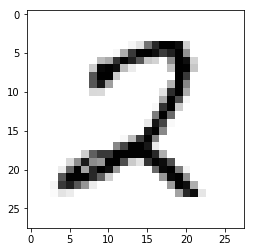

In [12]:
plt.imshow(Xdev[:,1233].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")

### Shifted Image

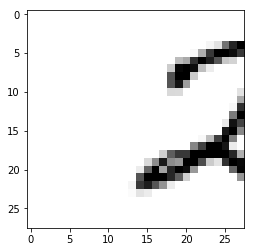

In [13]:
plt.imshow(Xtraindev[:,1233].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")

# Neural network

In [0]:
import tensorflow as tf

In [0]:
n_dim = 784

In [16]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.zeros([1, n_dim]))
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 10 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [19]:
sess, cost_history = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 100, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.678462
Reached epoch 10 cost J = 0.562282
Reached epoch 20 cost J = 0.482239
Reached epoch 30 cost J = 0.423907
Reached epoch 40 cost J = 0.379835
Reached epoch 50 cost J = 0.345526
Reached epoch 60 cost J = 0.318116
Reached epoch 70 cost J = 0.295727
Reached epoch 80 cost J = 0.277088
Reached epoch 90 cost J = 0.261317
Reached epoch 100 cost J = 0.247788


In [20]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.967197


In [21]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xdev, Y: ydev, learning_rate: 0.05}))

0.9706116


# Predictions on the traindev dataset

In [22]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xtraindev, Y: ytraindev, learning_rate: 0.05}))

0.45909452


# Exercise 1: build a training dataset to predict shifted images - difficulty: hard

To fight this problem we need to augment our training dataset. Do the following

1. Expand the training dataset adding to each image a new image shifted by 10 pixels with the right label.
2. Train your network on this new dataset
3. Evaluate the accuracy of your newly trained network on the ```traindev``` dataset. What do you observe? What accuaracy you get this time? 

**HINT** you can use code that is similar to this one to generate the new images

    Xtrain_sh = np.zeros_like(Xtrain)
    for i in range(Xtrain.shape[1]):
        tmp = Xtrain[:,i].reshape(28,28)
        tmp_shifted = np.zeros_like(tmp)
        tmp_shifted[:,10:28] = tmp[:,0:18]
        Xtrain_sh[:,i] = tmp_shifted.reshape(784)

    ytrain_sh = ytrain
    
at the end you have to merge the ```Xtrain``` array with the newly created ```Xtrain_sh```. Remember to merge also the labels!

## Code hint

In [0]:
Xtrain_sh = np.zeros_like(Xtrain)
for i in range(Xtrain.shape[1]):
    tmp = Xtrain[:,i].reshape(28,28)
    tmp_shifted = np.zeros_like(tmp)
    tmp_shifted[:,10:28] = tmp[:,0:18]
    Xtrain_sh[:,i] = tmp_shifted.reshape(784)
    
ytrain_sh = ytrain

In [0]:
Xtrain_sh.shape

(784, 11893)

In [0]:
Xtrain.shape

(784, 11893)

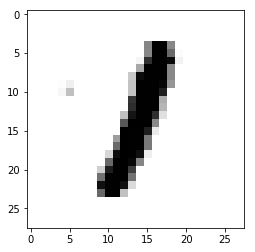

In [0]:
plt.imshow(Xtrain[:,1233].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")

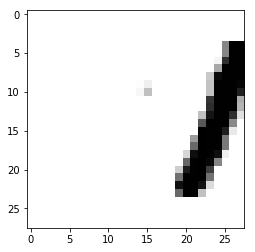

In [0]:
plt.imshow(Xtrain_sh[:,1233].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")